In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
sns.set(style="darkgrid") 
from scipy.stats import skew

In [2]:
df=pd.read_csv("Superstore.csv",encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
insured=df.copy()

In [4]:
insured.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
insured.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2014-119914,05-05-2014,10-05-2014,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
insured.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Observation
1. The total count of quantitative data rows is 9994.
2. The maximum sales is 22638.48
3. the maximum profit is 8399.976

In [7]:
insured.shape

(9994, 21)

In [8]:
insured.isnull().sum().values.sum()

0

In [9]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
insured.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
insured['Ship Mode']=insured['Ship Mode'].astype("category")
insured['State']=insured['State'].astype("category")
insured['Segement']=insured['Segment'].astype("category")
insured['Country']=insured['Country'].astype("category")
insured['City']=insured['City'].astype("category")
insured['Region']=insured['Region'].astype("category")
insured['Product ID']=insured['Product ID'].astype("category")
insured['Category']=insured['Category'].astype("category")

In [13]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Row ID         9994 non-null   int64   
 1   Order ID       9994 non-null   object  
 2   Order Date     9994 non-null   object  
 3   Ship Date      9994 non-null   object  
 4   Ship Mode      9994 non-null   category
 5   Customer ID    9994 non-null   object  
 6   Customer Name  9994 non-null   object  
 7   Segment        9994 non-null   object  
 8   Country        9994 non-null   category
 9   City           9994 non-null   category
 10  State          9994 non-null   category
 11  Postal Code    9994 non-null   int64   
 12  Region         9994 non-null   category
 13  Product ID     9994 non-null   category
 14  Category       9994 non-null   category
 15  Sub-Category   9994 non-null   object  
 16  Product Name   9994 non-null   object  
 17  Sales          9994 non-null   fl

In [14]:
insured.describe(include='category')

,Ship Mode,Country,City,State,Region,Product ID,Category,Segement
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,1,531,49,4,1862,3,3
top,Standard Class,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Consumer
freq,5968,9994,915,2001,3203,19,6026,5191


In [15]:
list_col=  insured.select_dtypes(['category']).columns
list_col

Index(['Ship Mode', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Segement'],
      dtype='object')

In [16]:
for i in list_col:
  print(insured[i].value_counts())

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
United States    9994
Name: Country, dtype: int64
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Redwood City       1
Holyoke            1
Redding            1
Iowa City          1
Aberdeen           1
Name: City, Length: 531, dtype: int64
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon  

Univariate Analysis

In [17]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage


[]

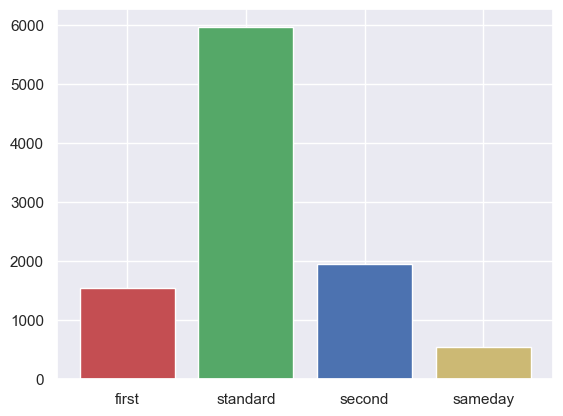

In [18]:
# no of classes
first = len(insured[insured['Ship Mode'] == 'First Class'])
standard = len(insured[insured['Ship Mode'] == 'Standard Class'])
second = len(insured[insured['Ship Mode'] == 'Second Class'])
sameday = len(insured[insured['Ship Mode'] == 'Same Day'])
plt.bar(['first','standard','second','sameday'],[first,standard,second,sameday],color = ['r','g','b','y'])
plt.plot()

[]

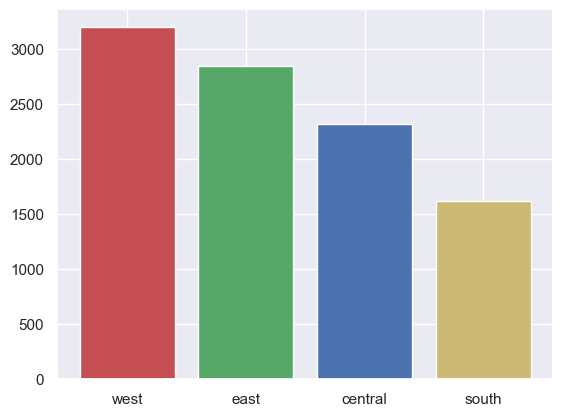

In [19]:
# no of region
west = len(insured[insured['Region'] == 'West'])
east = len(insured[insured['Region'] == 'East'])
central = len(insured[insured['Region'] == 'Central'])
south = len(insured[insured['Region'] == 'South'])
plt.bar(['west','east','central','south'],[west,east,central,south],color = ['r','g','b','y'])
plt.plot()

[]

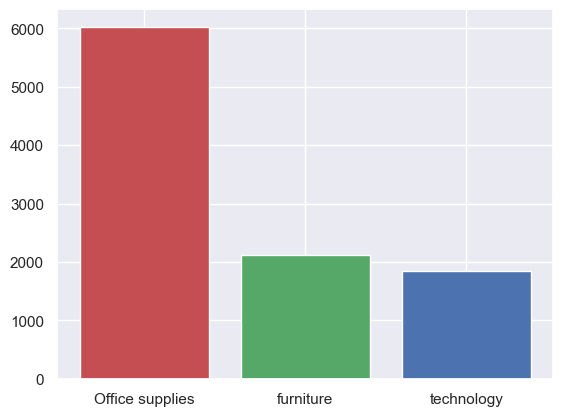

In [20]:
# no of category
office = len(insured[insured['Category'] == 'Office Supplies'])
furni = len(insured[insured['Category'] == 'Furniture'])
tech = len(insured[insured['Category'] == 'Technology'])
plt.bar(['Office supplies','furniture','technology'],[office,furni,tech],color = ['r','g','b'])
plt.plot()

[]

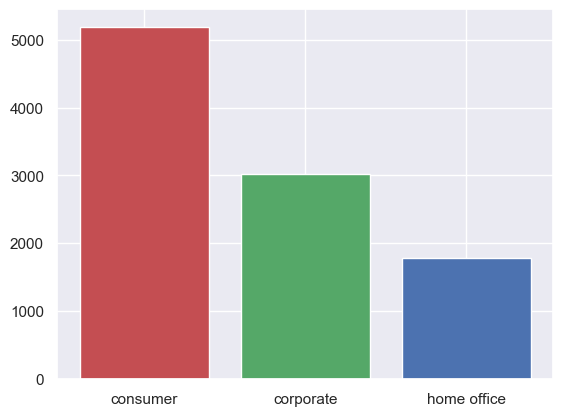

In [21]:

# no of segment
con = len(insured[insured['Segment'] == 'Consumer'])
cor = len(insured[insured['Segment'] == 'Corporate'])
home = len(insured[insured['Segment'] == 'Home Office'])
plt.bar(['consumer','corporate','home office'],[con,cor,home],color = ['r','g','b'])
plt.plot()

In [22]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts().index)
# index k k ho dinxa

for i in range(len(list_col)):
    print(list(insured[list_col[i]].value_counts()))
#count value dinxa

CategoricalIndex(['Standard Class', 'Second Class', 'First Class', 'Same Day'], categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False, dtype='category')
CategoricalIndex(['United States'], categories=['United States'], ordered=False, dtype='category')
CategoricalIndex(['New York City', 'Los Angeles', 'Philadelphia',
                  'San Francisco', 'Seattle', 'Houston', 'Chicago', 'Columbus',
                  'San Diego', 'Springfield',
                  ...
                  'Romeoville', 'Rogers', 'Hagerstown', 'Rock Hill',
                  'Rochester Hills', 'Redwood City', 'Holyoke', 'Redding',
                  'Iowa City', 'Aberdeen'],
                 categories=['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', ..., 'Yonkers', 'York', 'Yucaipa', 'Yuma'], ordered=False, dtype='category', length=531)
CategoricalIndex(['California', 'New York', 'Texas', 'Pennsylvania',
                  'Washington', 'Illinois', 'Ohio', 'Florida', 'Michigan',
   

In [23]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in list_col:
  # print(i,list(insured[i].value_counts().index),list(insured[i].value_counts()))
  data[i] = [list(insured[i].value_counts().index),list(insured[i].value_counts())]

data

{'Ship Mode': [['Standard Class', 'Second Class', 'First Class', 'Same Day'],
  [5968, 1945, 1538, 543]],
 'Country': [['United States'], [9994]],
 'City': [['New York City',
   'Los Angeles',
   'Philadelphia',
   'San Francisco',
   'Seattle',
   'Houston',
   'Chicago',
   'Columbus',
   'San Diego',
   'Springfield',
   'Dallas',
   'Jacksonville',
   'Detroit',
   'Newark',
   'Richmond',
   'Jackson',
   'Columbia',
   'Aurora',
   'Phoenix',
   'Long Beach',
   'Arlington',
   'San Antonio',
   'Miami',
   'Louisville',
   'Rochester',
   'Charlotte',
   'Henderson',
   'Lakewood',
   'Lancaster',
   'Fairfield',
   'Milwaukee',
   'Lawrence',
   'Denver',
   'Baltimore',
   'San Jose',
   'Pasadena',
   'Cleveland',
   'Fayetteville',
   'Salem',
   'Austin',
   'Atlanta',
   'Franklin',
   'Huntsville',
   'Wilmington',
   'Tampa',
   'Decatur',
   'Tucson',
   'Toledo',
   'Providence',
   'Lafayette',
   'Concord',
   'Oceanside',
   'Memphis',
   'Clinton',
   'Nashville',


[['West', 'East', 'Central', 'South'], [3203, 2848, 2323, 1620]]


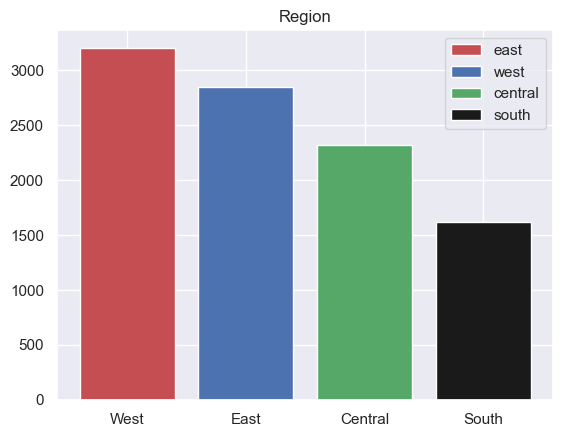

In [24]:
#Alternate
print(data['Region'])
plt.bar(data['Region'][0],data['Region'][1],
        label=['east', 'west', 'central', 'south'],
        color = ['r','b','g','k'])
plt.title('Region')
plt.legend()
plt.show()

Bivariate Analysis

In [25]:
insured.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


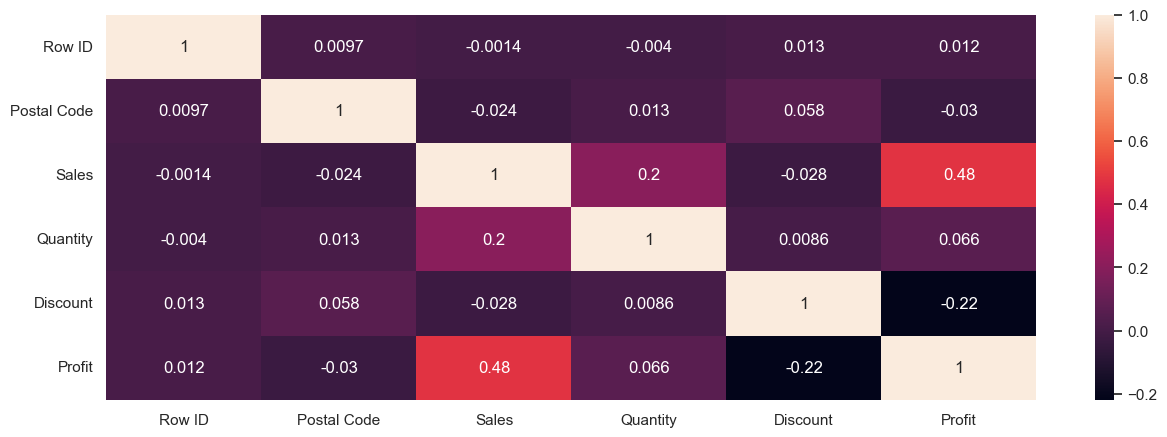

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

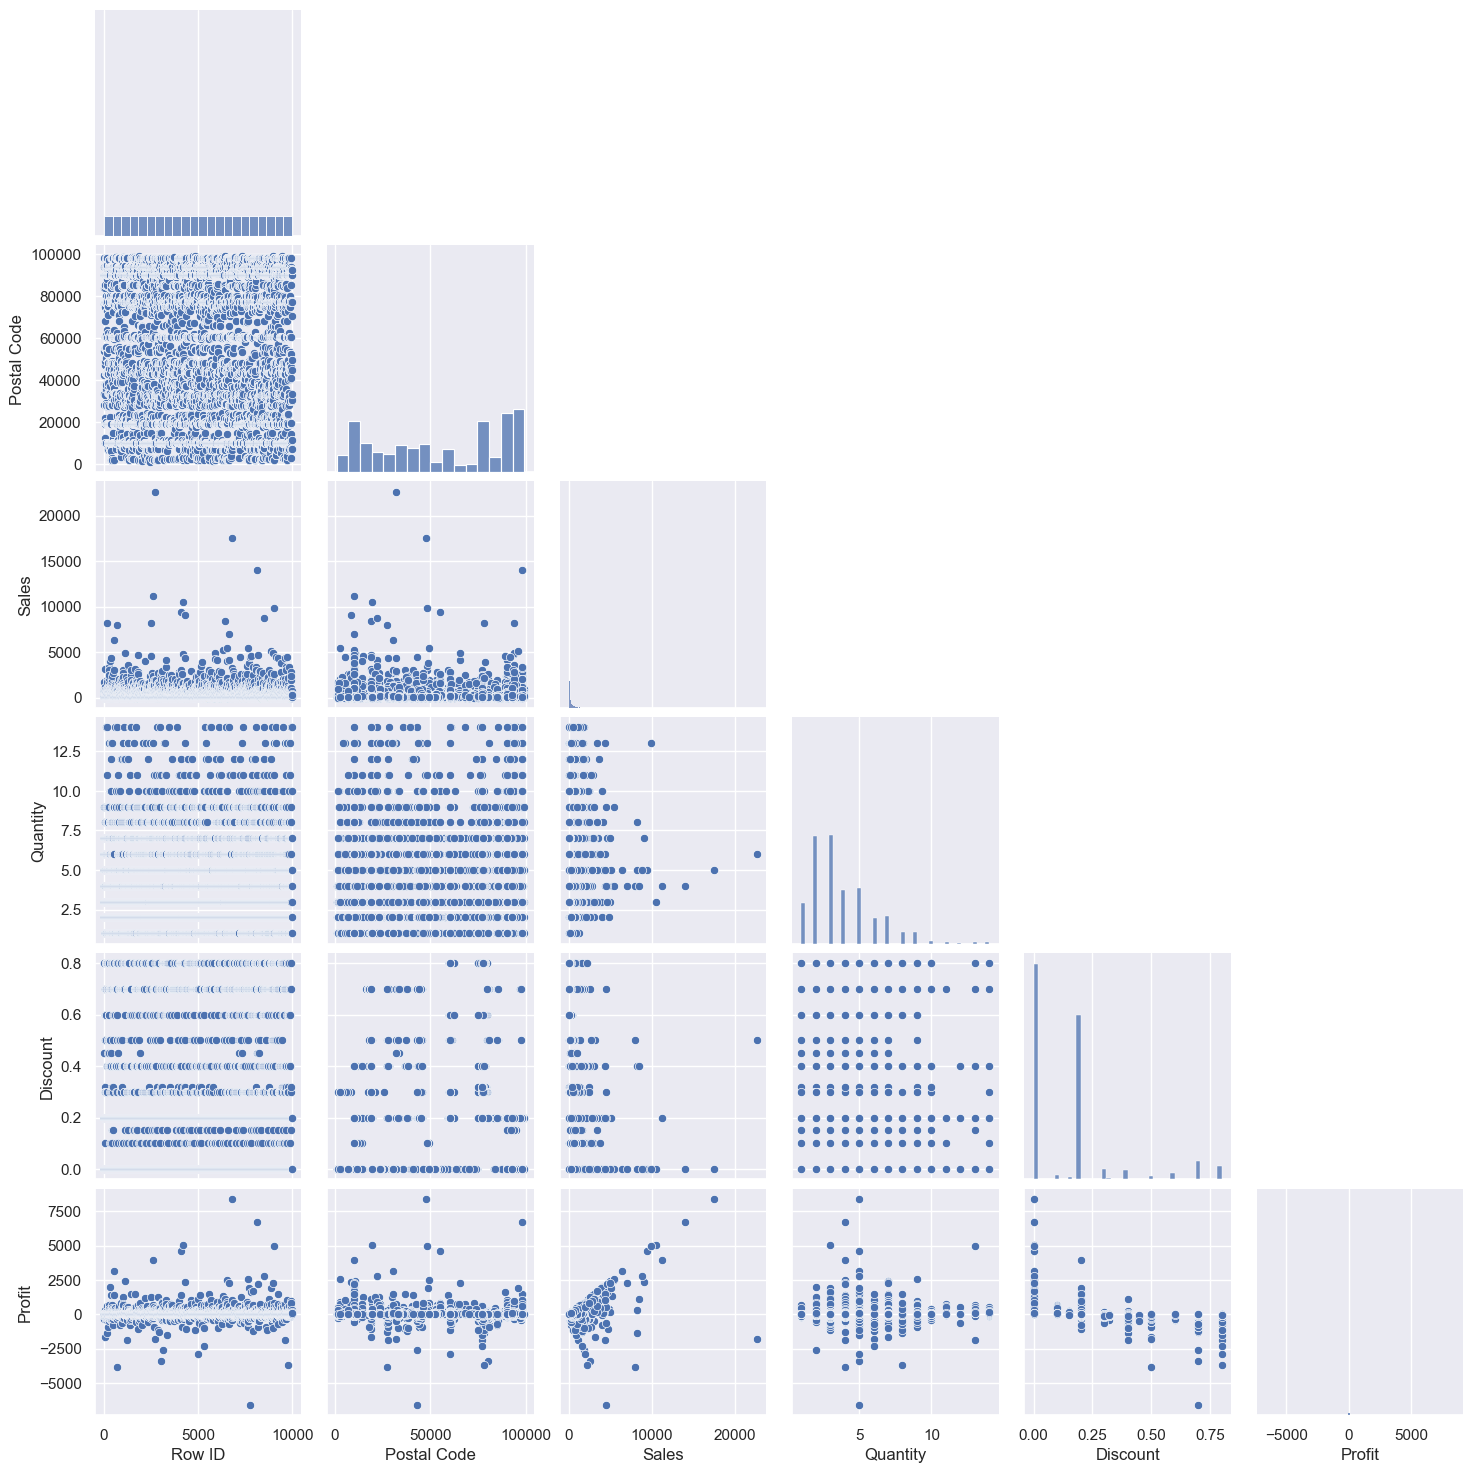

In [27]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured , corner=True)
plt.show()

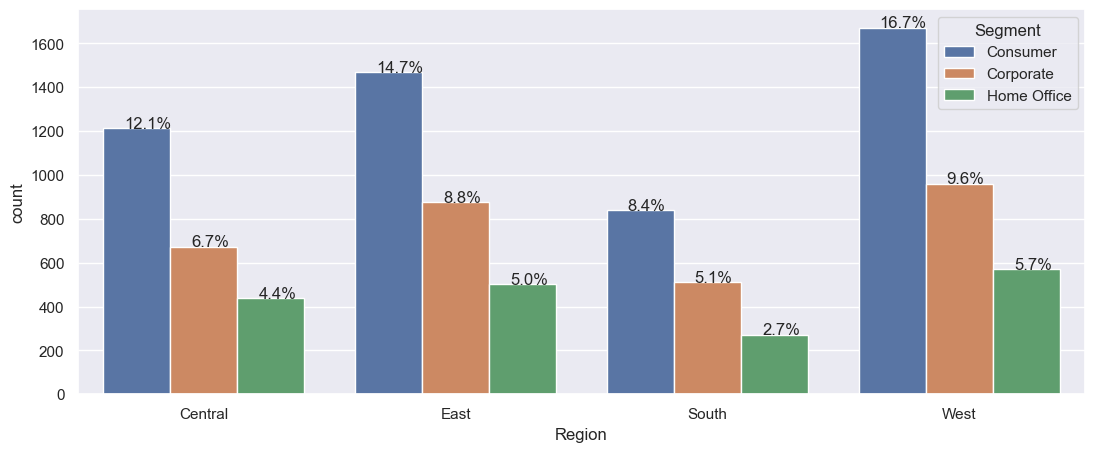

In [28]:
# Region vs Segment
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Region',hue='Segment',data=insured)
bar_perc(ax,insured['Segement'])


# Observation
1. there are 12.1% consumer, 6.7% corporate and 4.4% home office in central region.
2. there are 14.7% consumer, 8.8% corporate and 5.0% home office in east region.
3. there are 8.4% consumer, 5.1% corporate and 2.7% home office in south region.
4. there are 16.7% consumer, 9.6% corporate and 5.7% home office in west region.

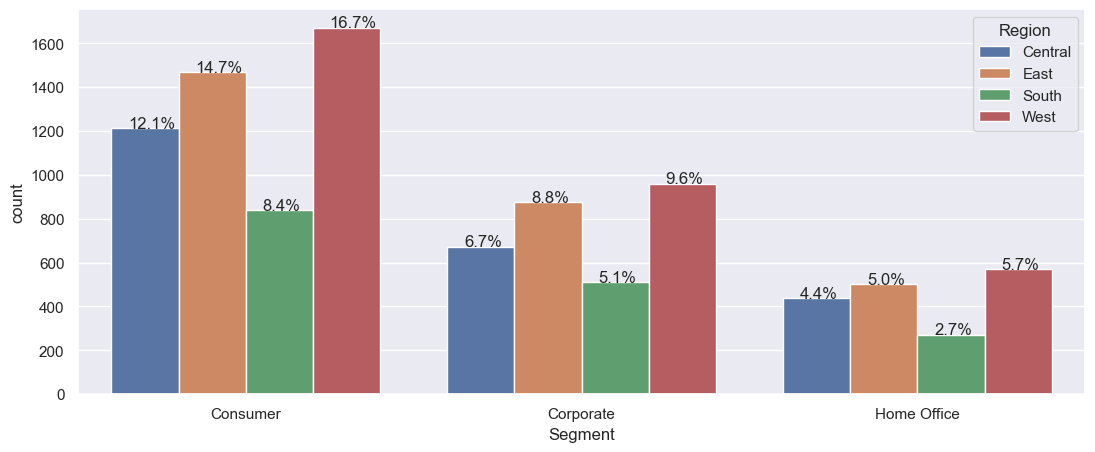

In [44]:
# Segment vs Region
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Segment',hue='Region',data=insured)
bar_perc(ax,insured['Region'])


# Observation
1. The central region has 12.1% consumer, 6.7% corporate and 4.4% home office.
2. The east region has 14.7% consumer, 8.8% corporate and 5.0% home office.
and so on

[Text(0.5, 1.0, 'Region vs Ship Mode')]

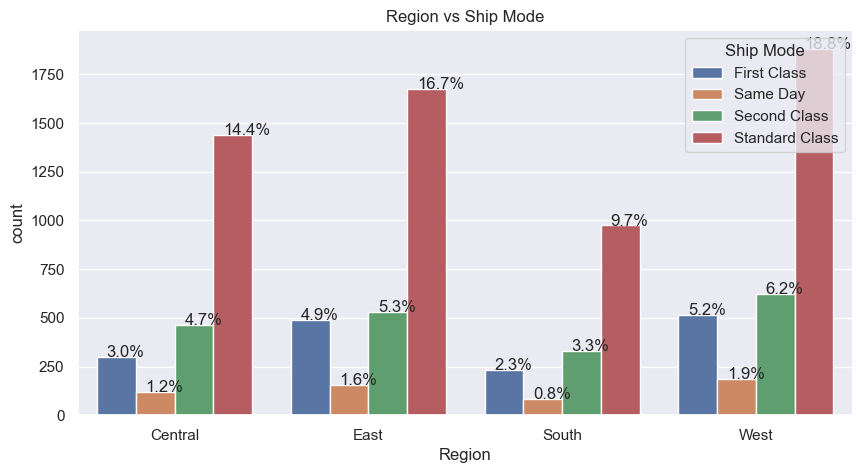

In [47]:
#region vs ship mode
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Region',hue='Ship Mode',data=insured)
bar_perc(ax,insured['Ship Mode'])
ax.set(title="Region vs Ship Mode")

[Text(0.5, 1.0, 'Region vs Category')]

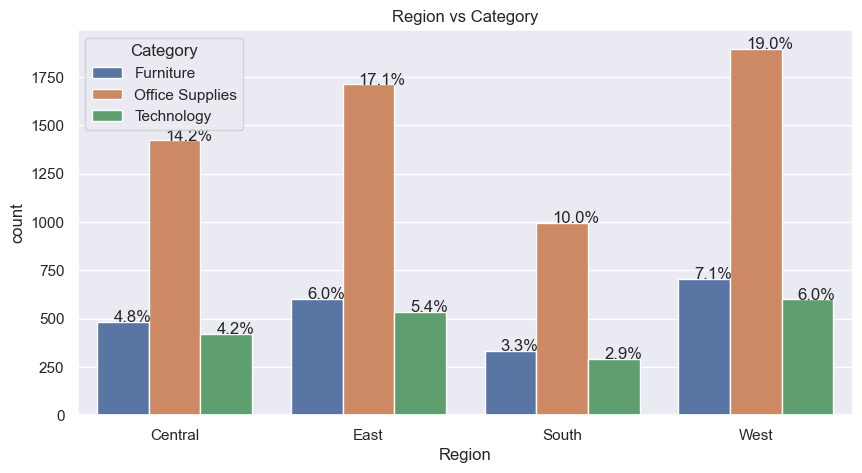

In [50]:
#region vs catgeory
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Region',hue='Category',data=insured)
bar_perc(ax,insured['Category'])
ax.set(title="Region vs Category")

In [53]:
insured.groupby(insured.Segment).Sales.mean()

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

In [58]:
insured.groupby(insured.Segment).Quantity.mean()

Segment
Consumer       3.760547
Corporate      3.843709
Home Office    3.782389
Name: Quantity, dtype: float64

In [59]:
insured.groupby(insured.Segment).Discount.mean()

Segment
Consumer       0.158141
Corporate      0.158228
Home Office    0.147128
Name: Discount, dtype: float64

In [60]:
insured.groupby(insured.Segment).Profit.mean()

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

In [57]:
insured.groupby(insured.Region).Sales.mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [61]:
insured.groupby(insured.Category).Sales.mean()

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

In [62]:
insured.groupby(insured.Category).Profit.mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

quantitive vs categorical

[Text(0.5, 1.0, 'Region vs Sales')]

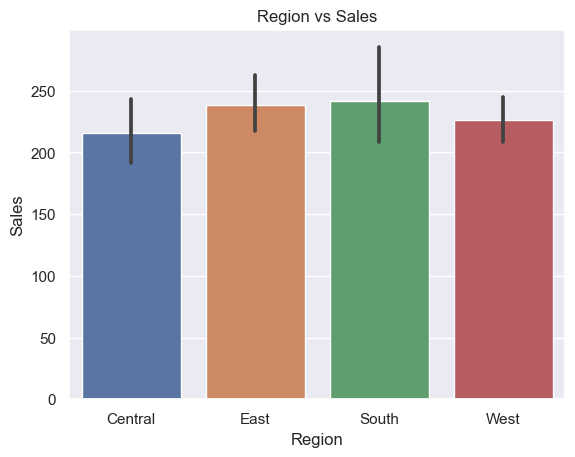

In [46]:
# region vs sales
sns.barplot(x=insured.Region,y=insured.Sales).set(title="Region vs Sales")

[Text(0.5, 1.0, 'Region vs Quantity')]

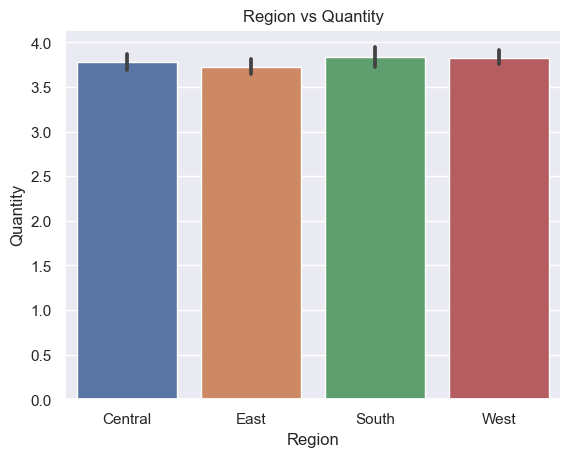

In [54]:
# region vs quantity
sns.barplot(x=insured.Region,y=insured.Quantity).set(title="Region vs Quantity")

[Text(0.5, 1.0, 'Region vs Discount')]

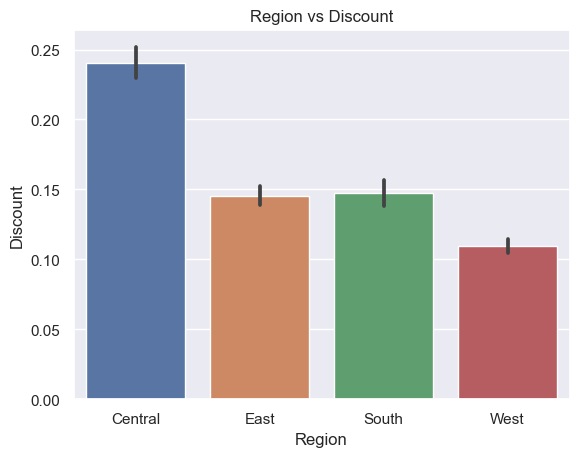

In [55]:
# region vs discount
sns.barplot(x=insured.Region,y=insured.Discount).set(title="Region vs Discount")

[Text(0.5, 1.0, 'Region vs Profit')]

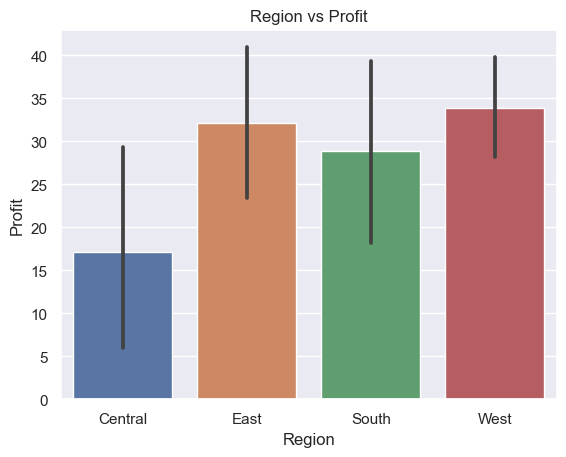

In [56]:
# region vs profit
sns.barplot(x=insured.Region,y=insured.Profit).set(title="Region vs Profit")

multivaraiate

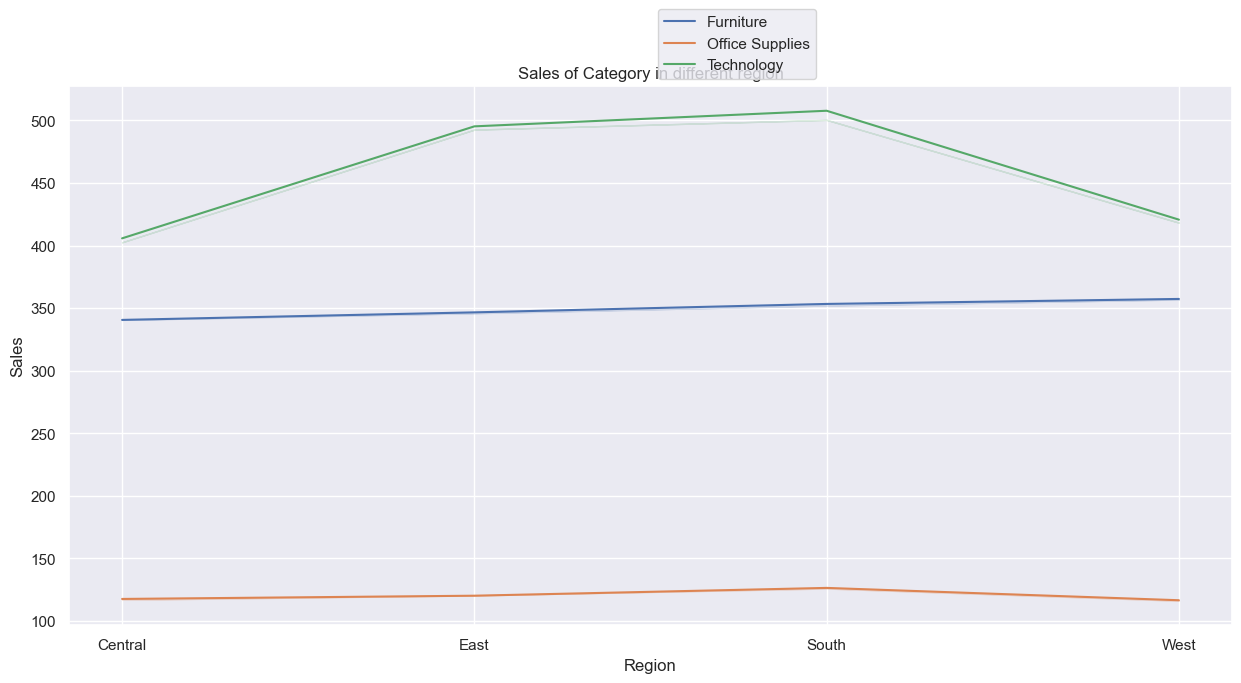

In [64]:
#multivariate
# three dimensional analysis
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Region"], y =insured["Sales"],hue=insured["Category"],ci=0).set(title= 'Sales of Category in different region')
plt.legend(bbox_to_anchor=(0.5, 1)) #0.5= x-axis ko bich ma and 1=y-axis ko top ma halne 
plt.show()

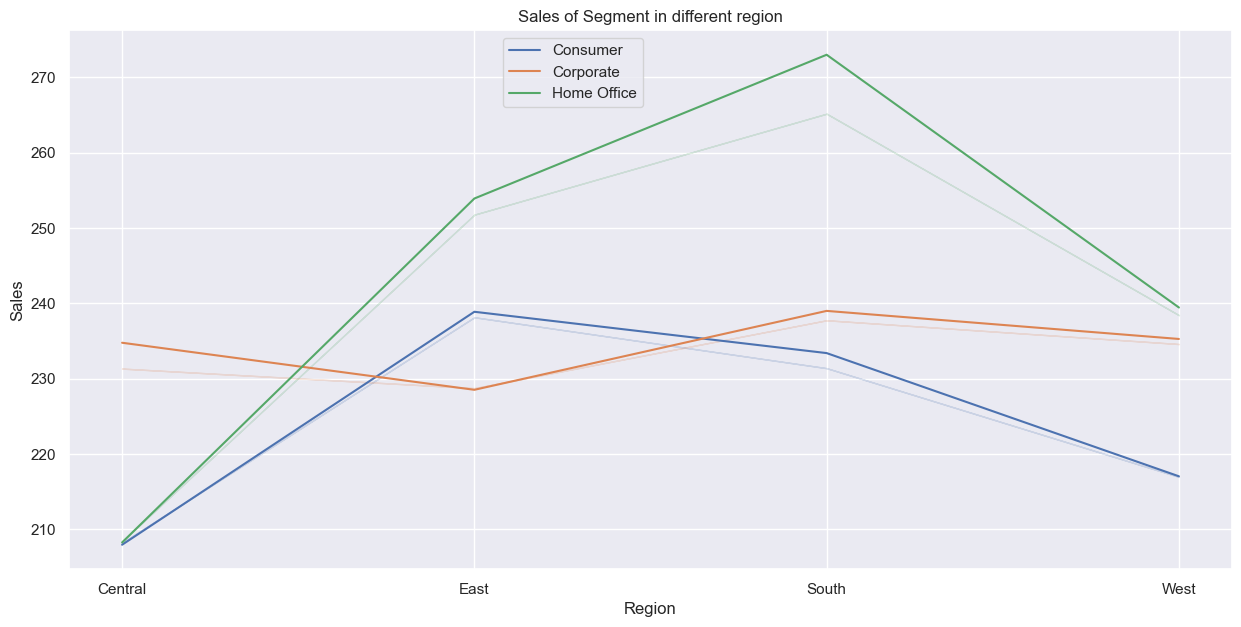

In [65]:
#multivariate
# three dimensional analysis
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Region"], y =insured["Sales"],hue=insured["Segment"],ci=0).set(title= 'Sales of Segment in different region')
plt.legend(bbox_to_anchor=(0.5, 1)) #0.5= x-axis ko bich ma and 1=y-axis ko top ma halne 
plt.show()

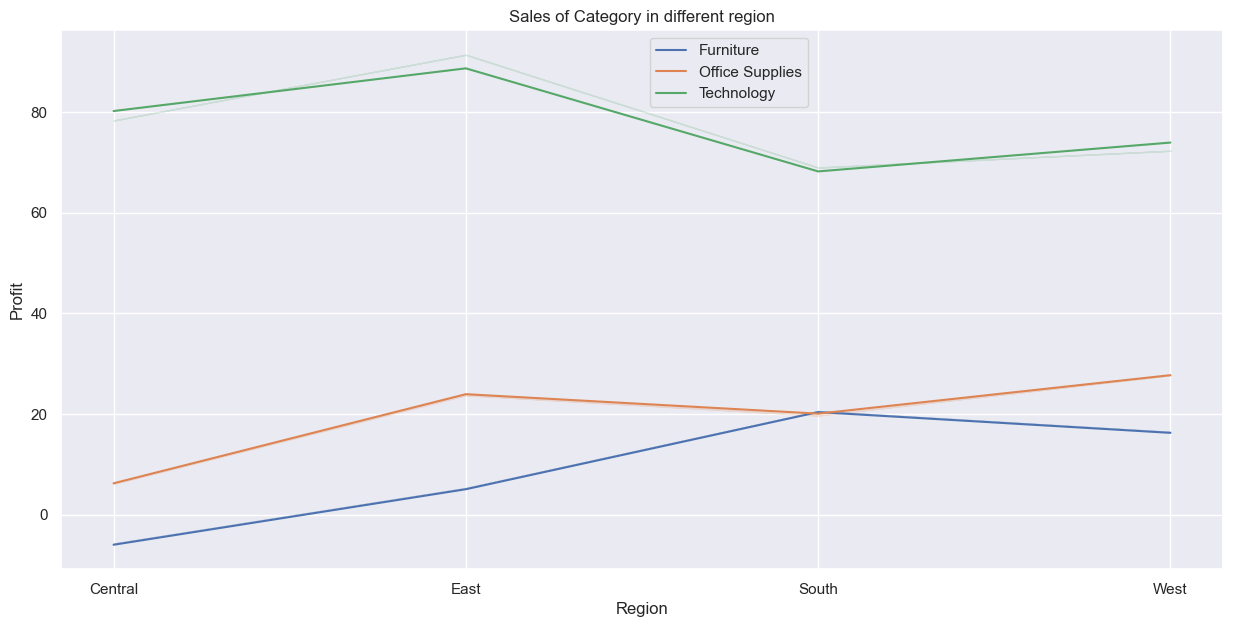

In [66]:
#multivariate
# three dimensional analysis
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Region"], y =insured["Profit"],hue=insured["Category"],ci=0).set(title= 'Profit of Category in different region')
plt.legend(bbox_to_anchor=(0.5, 1)) #0.5= x-axis ko bich ma and 1=y-axis ko top ma halne 
plt.show()

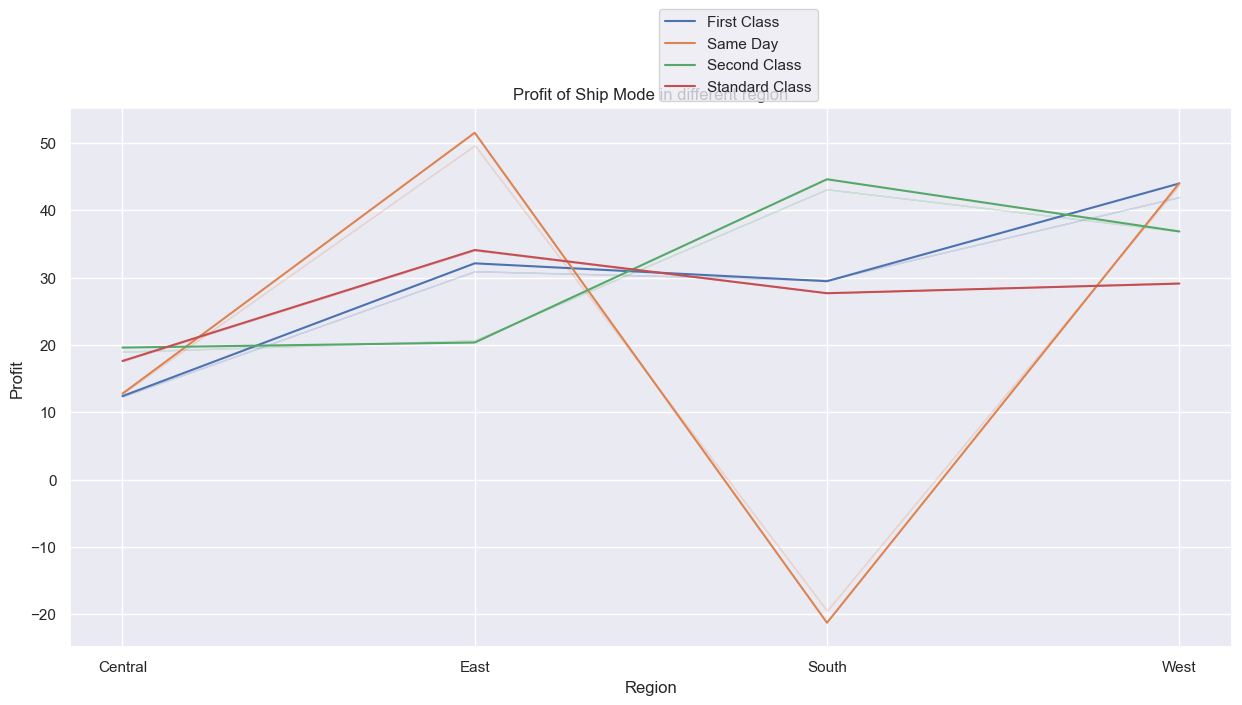

In [67]:
#multivariate
# three dimensional analysis
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Region"], y =insured["Profit"],hue=insured["Ship Mode"],ci=0).set(title= 'Profit of Ship Mode in different region')
plt.legend(bbox_to_anchor=(0.5, 1)) #0.5= x-axis ko bich ma and 1=y-axis ko top ma halne 
plt.show()

Cross Tab

In [69]:
df_region_char_catgeory=pd.crosstab(index=insured.Region, columns=insured.Category  , values=insured.Sales, aggfunc='mean')
df_region_char_catgeory


Category,Furniture,Office Supplies,Technology
Region,,,
Central,340.534644,117.458801,405.753124
East,346.574383,120.044425,495.278469
South,353.309289,126.282727,507.753952
West,357.302325,116.422377,420.687533


# Observation
1. The average sales of furniture in central region is 340.53, office supply is 117.45, and technology is 405.75.
2. The average sales of furniture in east region is 346.57, office supply is 120.04, and technology is 495.27.
and so on.

In [70]:
df_region_char2_catgeory=pd.crosstab(index=insured.Region, columns=insured.Category  , values=insured.Profit, aggfunc='sum')
df_region_char2_catgeory


Category,Furniture,Office Supplies,Technology
Region,,,
Central,-2871.0494,8879.9799,33697.4320
East,3046.1658,41014.5791,47462.0351
South,6771.2061,19986.3928,19991.8314
West,11504.9503,52609.8490,44303.6496


# Observation
1. The total profit of furniture in central region is -2871.04, office supply is 8879.97 and technology is 33697.43
2. The total profit of furniture in east region is 3046.16, office supply is 41014.57 and technology is 47462.03
ans so on.

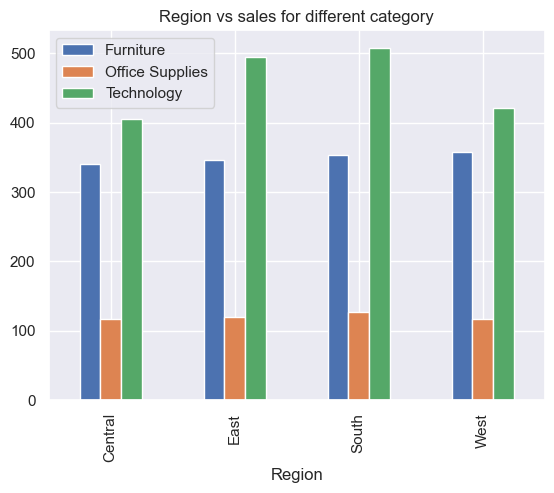

In [71]:
df_region_char_catgeory.plot(kind='bar',title="Region vs sales for different category")
plt.legend(loc='upper left')
plt.show()

# Observation
1. The sales of technology is highest in south region.
2. The sales of office supplies is the lowest in all regions.
3. The sales of furniture is nearly similar in all regions.

quantitative to qualitative

In [73]:
insured

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segement
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Consumer
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Consumer
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Corporate
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Consumer
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,Consumer
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Consumer
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Consumer
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,Consumer


In [76]:
category = pd.cut(insured.Quantity,bins=[1,2,3,4,5,6,7],labels=['1-3','3-5','5-7','7-9','9-11','11-13'])
# quantity ko range create gareko
insured.insert(3,'QuantityGroup',category)

In [77]:
insured.head(5)

,Row ID,Order ID,Order Date,QuantityGroup,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segement
0,1,CA-2013-152156,09-11-2013,1-3,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Consumer
1,2,CA-2013-152156,09-11-2013,3-5,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Consumer
2,3,CA-2013-138688,13-06-2013,1-3,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Corporate
3,4,US-2012-108966,11-10-2012,7-9,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Consumer
4,5,US-2012-108966,11-10-2012,1-3,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Consumer


In [78]:
quantity_bin_cat = insured.groupby(insured.QuantityGroup).Discount.mean()
quantity_bin_cat

QuantityGroup
1-3      0.154858
3-5      0.153329
5-7      0.157708
7-9      0.157146
9-11     0.166556
11-13    0.161980
Name: Discount, dtype: float64

<Axes: title={'center': 'Quantity Range Vs Average Discount'}, xlabel='QuantityGroup'>

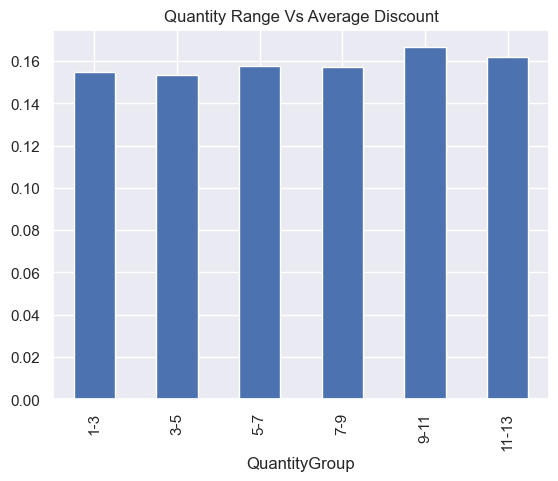

In [79]:
quantity_bin_cat.plot(kind='bar',title="Quantity Range Vs Average Discount")

In [80]:
quantity_bin_cat1 = insured.groupby(insured.QuantityGroup).Profit.mean()
quantity_bin_cat1

QuantityGroup
1-3      16.006831
3-5      23.667715
5-7      37.131310
7-9      40.257394
9-11     18.051517
11-13    56.579163
Name: Profit, dtype: float64

<Axes: title={'center': 'Quantity Range Vs Average Profit'}, xlabel='QuantityGroup'>

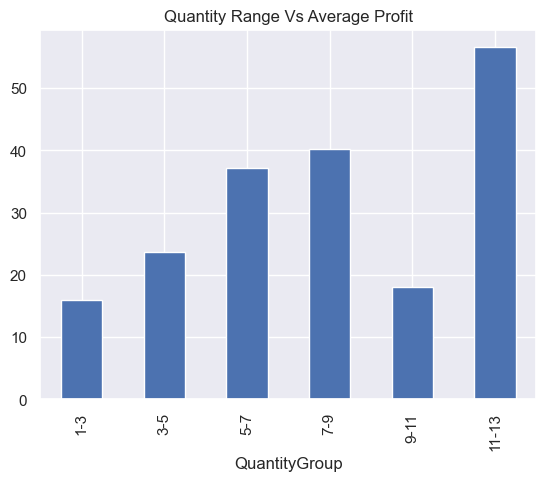

In [81]:
quantity_bin_cat1.plot(kind='bar',title="Quantity Range Vs Average Profit")

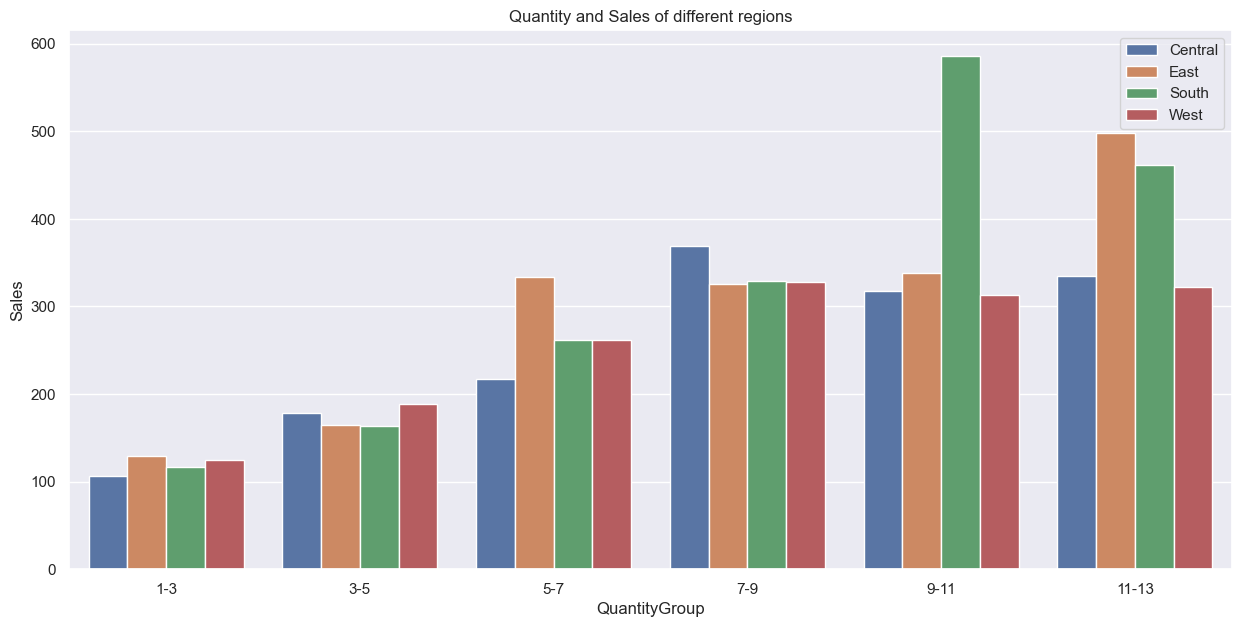

In [83]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["QuantityGroup"],y=insured["Sales"],hue=insured['Region'],ci=0).set(title= 'Quantity and Sales of different regions')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

# Analysis of top 5 products

In [4]:
insured

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,22-01-2011,24-01-2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,27-02-2014,04-03-2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200
